<a href="https://colab.research.google.com/github/alinecdet/csc725/blob/main/Hw2B_RetinexDecompositionAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# prompt: Retinex Decomposition algorithm for low light image enhancement

import cv2
import numpy as np

def retinex_decomposition(image):
  """
  Performs Retinex decomposition on an image.

  Args:
    image: A numpy array representing the image.

  Returns:
    A tuple containing the log-illumination and log-reflectance components of the image.
  """

  # Convert the image to floating-point values.
  image = image.astype(np.float64)

  # Calculate the average intensity of the image.
  avg_intensity = np.mean(image)

  # Calculate the log-illumination component.
  log_illumination = np.log10(image / avg_intensity)

  # Calculate the log-reflectance component.
  log_reflectance = np.log10(image) - log_illumination

  return log_illumination, log_reflectance

# Load the image.
image = cv2.imread('/content/subtracted.jpg')

# Perform Retinex decomposition.
log_illumination, log_reflectance = retinex_decomposition(image)

# Convert the log-illumination and log-reflectance components back to uint8.
log_illumination = (log_illumination * 255).astype(np.uint8)
log_reflectance = (log_reflectance * 255).astype(np.uint8)

# Save the log-illumination and log-reflectance components.
cv2.imwrite('log_illumination.jpg', log_illumination)
cv2.imwrite('log_reflectance.jpg', log_reflectance)


<ipython-input-10-2018da1337cc>:24: RuntimeWarning: divide by zero encountered in log10
  log_illumination = np.log10(image / avg_intensity)
<ipython-input-10-2018da1337cc>:27: RuntimeWarning: divide by zero encountered in log10
  log_reflectance = np.log10(image) - log_illumination
<ipython-input-10-2018da1337cc>:27: RuntimeWarning: invalid value encountered in subtract
  log_reflectance = np.log10(image) - log_illumination
<ipython-input-10-2018da1337cc>:38: RuntimeWarning: invalid value encountered in cast
  log_illumination = (log_illumination * 255).astype(np.uint8)
<ipython-input-10-2018da1337cc>:39: RuntimeWarning: invalid value encountered in cast
  log_reflectance = (log_reflectance * 255).astype(np.uint8)


True

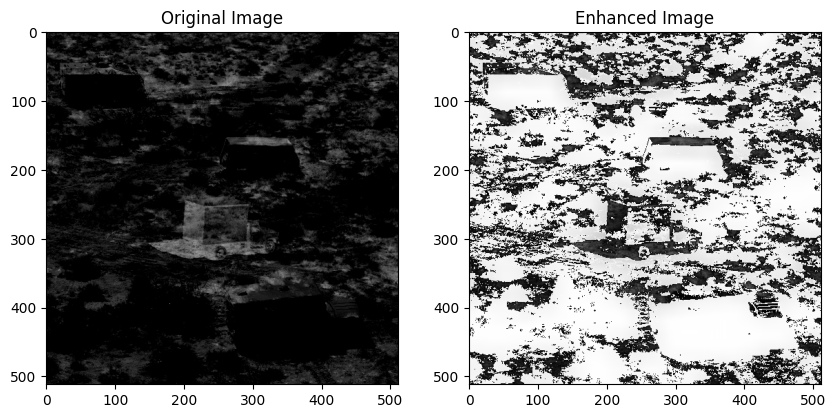

In [11]:
# prompt: Retinex Decomposition algorithm for low light image enhancement

import cv2
import numpy as np
import matplotlib.pyplot as plt

def retinex_decomposition(img):
  # Convert to float
  img_float = np.float64(img) / 255.0

  # Calculate the logarithm of the image
  log_img = np.log10(img_float + 1)

  # Calculate the illumination map
  illumination_map = cv2.blur(log_img, (50, 50))

  # Calculate the reflectance map
  reflectance_map = log_img - illumination_map

  # Convert back to uint8
  reflectance_map = np.uint8(np.power(10.0, reflectance_map) * 255.0)

  return reflectance_map

# Load the image
img = cv2.imread('/content/subtracted.jpg')

# Apply the Retinex decomposition algorithm
enhanced_img = retinex_decomposition(img)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(enhanced_img)
plt.title('Enhanced Image')
plt.show()
